<a href="https://colab.research.google.com/github/RogueRock/IDC410-ML/blob/main/question_identifier_MS21008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IDC410 Question Identifier
### Vatsal Kabra (MS21008)

In [ ]:
#importing modules
import numpy as np
import pandas as pd

### Reading dataframe and exlporing its features

In [ ]:
df = pd.read_csv("/Users/perseus/Downloads/1646977175-5e748a2d5fc288e9f69c5f86.csv")
print(df.head(10))
print(df.shape)
df.columns = ['row_no', 'sentence', 'label']
print(df.columns)

non_sentence_rows = df[df['label'] != 'sentence']
print(non_sentence_rows)

   Unnamed: 0                                           sentence     label
0           0  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...  sentence
1           1  Born and raised in Houston, Texas, she perform...  sentence
2           2  Managed by her father, Mathew Knowles, the gro...  sentence
3           3  Their hiatus saw the release of Beyoncé's debu...  sentence
4           4  Following the disbandment of Destiny's Child i...  sentence
5           5  Beyoncé also ventured into acting, with a Gold...  sentence
6           6  Her marriage to rapper Jay Z and portrayal of ...  sentence
7           7  Beyoncé took a hiatus from music in 2010 and t...  sentence
8           8  Her critically acclaimed fifth studio album, B...  sentence
9           9  A self-described "modern-day feminist", Beyonc...  sentence
(235110, 3)
Index(['row_no', 'sentence', 'label'], dtype='object')
        row_no                                           sentence     label
94224    94224           When di

In [ ]:
print(df.loc[1]['sentence'])

Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny's Child.


In [ ]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## cleaning and lemmatizing the 'sentences'

In [ ]:
%%time
import re
import string
#from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import spacy, gensim
nlp = spacy.load("en_core_web_sm")

def text_cleaner(df):
    cleaned_list = []
    sentences = df.sentence.values.tolist()
        # remove digits
    sentences = [re.sub(r'\b\d+\b', '', sentence) for sentence in sentences]
    def rm_punctuation (sentences):
        for i in sentences:
            yield(gensim.utils.simple_preprocess(str(i), deacc=True))  # deacc=True removes punctuations

    data_words = list(rm_punctuation(sentences))

    for words in data_words:
        doc = nlp(" ".join(words))  # Join the words to form a single string and apply spaCy's NLP pipeline
        lemmatized_sentence = ' '.join([token.lemma_ for token in doc])
        cleaned_list.append(lemmatized_sentence)

    return cleaned_list

result1 = text_cleaner(df)
print(result1[:10])

['beyonce giselle knowles carter biːˈjɒnseɪ bee yon say bear september be an american singer songwriter record producer and actress', 'bear and raise in houston texas she perform in various singing and dancing competition as child and rise to fame in the late as lead singer of girl group destiny child', 'manage by her father mathew knowle the group become one of the world good sell girl group of all time', 'their hiatus see the release of beyonce debut album dangerously in love which establish she as solo artist worldwide earn five grammy award and feature the billboard hot number one single crazy in love and baby boy', 'follow the disbandment of destiny child in june she release her second solo album day which contain hit deja vu irreplaceable and beautiful liar', 'beyonce also venture into act with golden globe nominate performance in dreamgirl and star role in the pink panther and obsess', 'her marriage to rapper jay and portrayal of etta james in cadillac record influence her third

## Splitting the dataframe into train and test dataframes

In [ ]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(result1, df['label'], test_size=0.2, random_state=42)
print(len(x_train1))
print(len(x_test1))

188088
47022


## Using Count Vectorization

In [ ]:
#using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(analyzer = 'word', token_pattern='[a-zA-Z0-9]{3,}', binary = True)

data_vectorized1 = vectorizer1.fit_transform(x_train1)
data_vectorized2 = vectorizer1.transform(x_test1)

In [ ]:
vectorizer1.vocabulary_

{'similarly': 50834,
 'the': 55242,
 'constitution': 11952,
 'massachusetts': 34066,
 'originally': 39872,
 'provide': 44421,
 'that': 55236,
 'subject': 53221,
 'shall': 50098,
 'hurt': 25809,
 'molest': 36066,
 'restrain': 46842,
 'his': 25032,
 'person': 41830,
 'liberty': 31790,
 'estate': 18290,
 'for': 20418,
 'worship': 61080,
 'god': 22434,
 'manner': 33611,
 'and': 2237,
 'season': 49406,
 'most': 36525,
 'agreeable': 1075,
 'dictate': 14979,
 'own': 40391,
 'conscience': 11841,
 'doth': 16040,
 'not': 38691,
 'disturb': 15652,
 'public': 44562,
 'peace': 41387,
 'obstruct': 39125,
 'other': 40075,
 'their': 55260,
 'religious': 46411,
 'article': 3467,
 'but': 8032,
 'also': 1798,
 'what': 60440,
 'year': 61559,
 'german': 21951,
 'subsidiary': 53276,
 'dehomag': 14131,
 'open': 39603,
 'business': 8010,
 'who': 60569,
 'pass': 41122,
 'osborne': 39989,
 'judgment': 28886,
 'how': 25565,
 'many': 33698,
 'child': 9937,
 'she': 50216,
 'have': 24140,
 'youtube': 61755,
 'kid':

In [ ]:
print(len(vectorizer1.vocabulary_))
data_vectorized1

62264


<188088x62264 sparse matrix of type '<class 'numpy.int64'>'
	with 2014375 stored elements in Compressed Sparse Row format>

## Using Multinomial Naives Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(data_vectorized1, y_train1)
# predict label for one instance
predictions = clf.predict(data_vectorized2)

In [ ]:
from sklearn.metrics import accuracy_score
# calculate accuracy
accuracy = accuracy_score(y_test1, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9270128875845349


In [ ]:
from sklearn.metrics import confusion_matrix
# making confusion matrix
conf_matrix = confusion_matrix(y_test1, predictions)# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[25160  1258]
 [ 2174 18430]]


### Using Stochastic Gradient Descent Classifier from sklearn

In [ ]:
from sklearn.linear_model import SGDClassifier

model_sgd = SGDClassifier( alpha = 0.00001)
model_sgd.fit(data_vectorized1, y_train1)
y_pred = model_sgd.predict(data_vectorized2)
accuracy = accuracy_score(y_test1, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9719067670452128


## LSA vectorization

In [ ]:
size = data_vectorized1.shape[0]*data_vectorized1.shape[1]
print("Sparsicity: ", len(data_vectorized1.data)/size*100, "%")

Sparsicity:  0.017200545363242947 %


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=180)
lsa = svd.fit_transform(data_vectorized1.T)

In [ ]:
svd2 = TruncatedSVD(n_components=2)
lsa2 = svd2.fit_transform(data_vectorized1.T)
U = lsa2 / svd2.singular_values_
Sigma_matrix = np.diag(svd2.singular_values_)
VT = svd2.components_

In [ ]:
svd.components_.T

array([[ 4.08334027e-03, -3.36651983e-03,  3.39481627e-03, ...,
         3.42370676e-03, -6.83811891e-04,  2.58304774e-03],
       [ 3.22534904e-03,  3.33735197e-03, -4.19889387e-04, ...,
        -1.88524197e-03, -5.01967065e-04,  2.03404678e-03],
       [ 2.12190513e-03, -6.22095811e-04, -3.66598627e-03, ...,
        -3.93950374e-04, -7.11232557e-05,  2.13090369e-04],
       ...,
       [ 8.13452325e-04,  3.70543608e-03,  1.90075787e-03, ...,
         7.29210958e-05,  1.80877997e-04, -4.69045504e-04],
       [ 3.79606377e-03,  1.42710973e-03,  3.47806055e-03, ...,
        -6.13066474e-04, -1.01983443e-03, -1.37738024e-03],
       [ 2.85549135e-03,  3.30145446e-03, -9.93345006e-04, ...,
        -4.32539064e-03,  1.38755363e-03,  5.19376916e-04]])

In [ ]:
svd2.explained_variance_ratio_[0]/svd2.explained_variance_ratio_[1]

3.0280374720047543

In [ ]:
svd2.explained_variance_ratio_

array([0.08274105, 0.02732498])

In [ ]:
np.sum(svd.explained_variance_ratio_)

0.40702266170312107

## LDA

In [ ]:
pip install funcy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import funcy as fp

FILTER_REGEX = re.compile(r"[a-zA-Z0-9]{3,}")

def tokenize_line(line):
    res = line.lower().split()
    tokens=[]
    for word in res:
        if re.findall(FILTER_REGEX,word):
            tokens.append(word)
    return tokens

def tokenize(lines):
    tokens = [tokenize_line(line) for line in lines]
    return tokens


d = [one for one in tokenize(result1)]

/opt/anaconda3/lib/python3.11/re/__init__.py:277: RuntimeWarning: coroutine 'Server.serve' was never awaited
  return _cache[type(pattern), pattern, flags]


In [ ]:
from gensim.corpora import Dictionary
dictionary = Dictionary(d)
dictionary.compactify()
corpus = [dictionary.doc2bow(doc) for doc in d]
len(corpus)

235110

In [ ]:
from gensim import models
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)

In [ ]:
from gensim.matutils import Sparse2Corpus

corpus_test = Sparse2Corpus(data_vectorized2.transpose())
#predict topics for test documents
test_topics = [lda.get_document_topics(doc) for doc in corpus_test]

In [ ]:
from gensim.models import CoherenceModel

# compute coherence score
coherence_model_lda = CoherenceModel(model=lda, texts=d, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')

Coherence Score: 0.36029137460747873


## TFIDF

### tf-idf = term_frequency * inverse_document_frequency
### inverse_document_frequency = log(total number of documents / number of documents with term) + 1

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()
bag_of_words = vectorizer_tfidf.fit_transform(result1)

CPU times: user 1.21 s, sys: 51.1 ms, total: 1.26 s
Wall time: 1.27 s


In [ ]:
bag_of_words

<235110x69830 sparse matrix of type '<class 'numpy.float64'>'
	with 3066033 stored elements in Compressed Sparse Row format>

In [ ]:
x_train_logreg, x_test_logreg, y_train_logreg, y_test_logreg = train_test_split(bag_of_words, df['label'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(x_train_logreg, y_train_logreg)
log_reg_pred = log_reg.predict(x_test_logreg)
accuracy = accuracy_score(y_test_logreg, log_reg_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9766917613032198


## Word and sentence embedding using Word2Vec

In [ ]:
from gensim.models import Word2Vec
tokenized_sentences = [sentence.split() for sentence in result1]
model_w2v = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=5)

result = " the word is the bird"
print(model_w2v)

Word2Vec<vocab=21887, vector_size=100, alpha=0.025>


In [ ]:
word_to_index= model_w2v.wv.key_to_index
print(word_to_index)

{'the': 0, 'be': 1, 'of': 2, 'in': 3, 'and': 4, 'what': 5, 'to': 6, 'do': 7, 'for': 8, 'as': 9, 'have': 10, 'by': 11, 'that': 12, 'with': 13, 'on': 14, 'from': 15, 'which': 16, 'who': 17, 'how': 18, 'when': 19, 'at': 20, 'use': 21, 'an': 22, 'it': 23, 'many': 24, 'or': 25, 'year': 26, 'not': 27, 'first': 28, 'other': 29, 'his': 30, 'this': 31, 'their': 32, 'city': 33, 'its': 34, 'where': 35, 'one': 36, 'they': 37, 'new': 38, 'most': 39, 'state': 40, 'also': 41, 'he': 42, 'can': 43, 'name': 44, 'make': 45, 'during': 46, 'time': 47, 'after': 48, 'include': 49, 'more': 50, 'but': 51, 'two': 52, 'some': 53, 'part': 54, 'century': 55, 'people': 56, 'th': 57, 'into': 58, 'all': 59, 'country': 60, 'such': 61, 'become': 62, 'large': 63, 'world': 64, 'war': 65, 'between': 66, 'call': 67, 'there': 68, 'than': 69, 'system': 70, 'type': 71, 'group': 72, 'high': 73, 'know': 74, 'area': 75, 'form': 76, 'about': 77, 'over': 78, 'only': 79, 'take': 80, 'work': 81, 'language': 82, 'would': 83, 'early':

In [ ]:
vocab_size = list(model_w2v.wv.index_to_key)
print("Vocabulary size:", len(vocab_size))

Vocabulary size: 21887


In [ ]:
def sentence_embedding(sentence, model):
    #tokenize the sentence
    tokens = sentence.split()

    #filter out tokens that are not in the vocabulary
    tokens = [token for token in tokens if token in model.wv]

    if len(tokens) == 0:
        #if no tokens are in the vocabulary, return None
        return None

    #calculate the average embedding of tokens
    embeddings = [model.wv[token] for token in tokens]
    avg_embedding = np.mean(embeddings, axis=0)

    return avg_embedding

#can be used as follows
embeddings = []
for sentence in result1:
    embedding = sentence_embedding(sentence, model_w2v)
    if embedding is not None:
        embeddings.append(embedding)

print("Number of sentences:", len(result1))
print("Number of valid sentence embeddings:", len(embeddings))
print("Example sentence embedding shape:", embeddings[0].shape)
print("Example sentence embedding:", embeddings[0])

Number of sentences: 235110
Number of valid sentence embeddings: 234354
Example sentence embedding shape: (100,)
Example sentence embedding: [-0.34580138 -0.00768659 -0.25451764  0.45872337 -0.6083974   0.23244604
  0.5466284  -0.03110604 -0.32401466  0.05940129 -0.17242461 -0.44542912
  0.1209514  -0.06399487  0.61764497 -0.04356748 -0.29590017 -0.24371716
  0.03122737 -0.5640586   0.68275803 -0.6597538   0.03777001 -0.01918983
 -0.4366566  -0.34232092  0.4592583  -0.25277212 -0.14771555 -0.2838782
 -0.23295411 -0.00980516  0.3311072  -0.3536829  -0.4682948   0.3575263
 -0.06071611 -0.18955347 -0.24408866  0.30506408  0.00591997 -0.2732059
 -0.4902221   0.10629912 -0.53926075  0.28547174  0.14832155  0.23937236
  0.09180512  0.6684283   0.01155783 -0.00781213 -0.03884752  0.31442967
  0.2142334  -0.07393432 -0.02120548 -0.10048916  0.10584569  0.52938867
 -0.00319516 -0.34264916 -0.14758974 -0.03412406 -0.18834636 -0.41804564
 -0.39713714  0.16431358 -0.47463018  0.02066388 -0.5548697

## using word embeddings to build a binary classifier having one RNN layer

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
word_embeddings = model_w2v.wv.vectors
print(word_embeddings)

[[-0.05098595 -1.1976306   1.2891018  ... -0.44322783 -1.1850289
   0.60406333]
 [-0.2729495  -1.3237274   0.9672361  ... -0.42070317 -1.2853283
  -0.7919486 ]
 [ 0.3121223  -1.0680215  -1.4251622  ...  0.4743489  -0.20700422
  -0.19858263]
 ...
 [-0.02232878  0.02359121 -0.09036845 ...  0.03106422  0.01632557
  -0.054249  ]
 [-0.0492653   0.02480001 -0.01523056 ...  0.06129184 -0.01595866
  -0.01745265]
 [-0.05661517  0.05073842 -0.02268768 ...  0.01713078  0.0169287
   0.02001479]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(result1, df['label'], test_size=0.20, random_state=42)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_train

array([[2462,    1,  559, ...,    0,    0,    0],
       [   4,    6,   27, ...,    0,    0,    0],
       [  18,  416,    1, ...,    0,    0,    0],
       ...,
       [   6,  428, 1229, ...,    0,    0,    0],
       [   6,   72,    3, ...,    0,    0,    0],
       [   6,  164,  933, ...,    0,    0,    0]], dtype=int32)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#one hot coding the labels so as to get predictions
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(Y_train)
y_test_encoded = label_encoder.fit_transform(Y_test)
#initialize one hot encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

#reshape to a 2D array
y_train_encoded = y_train_encoded.reshape(-1, 1)
y_test_encoded = y_test_encoded.reshape(-1, 1)

y_train_onehot = onehot_encoder.fit_transform(y_train_encoded)
y_test_onehot = onehot_encoder.fit_transform(y_test_encoded)


In [ ]:
from tensorflow.keras import regularizers

l1_reg = 1*10**(-5)
l2_reg = 1*10**(-4)

#the input layer
input_layer = tf.keras.layers.Input(shape=(maxlen,))
#the embedding layer
embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_embeddings.shape[1], trainable=False)(input_layer)
#the RNN layer
rnn_layer = tf.keras.layers.SimpleRNN(units=64)(embedding_layer)
#the first dense layer
dense_layer1 = tf.keras.layers.Dense(units=64, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(rnn_layer)
#the output layer
output_layer = tf.keras.layers.Dense(units=2, activation='softmax', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(dense_layer1)
#the model
model_rnn = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 100)       │     6,375,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,390,450 (24.38 MB)

 Trainable params: 14,850 (58.01 KB)

 Non-trainable params: 6,375,600 (24.32 MB)

In [ ]:
history = model_rnn.fit(X_train, y_train_onehot ,epochs = 10, batch_size = 32)

Epoch 1/10
5878/5878 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.5764 - loss: 0.6764
Epoch 2/10
5878/5878 ━━━━━━━━━━━━━━━━━━━━ 79s 14ms/step - accuracy: 0.5575 - loss: 0.6885
Epoch 3/10
5878/5878 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.5588 - loss: 0.6861
Epoch 4/10
5878/5878 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - accuracy: 0.6922 - loss: 0.5638
Epoch 5/10
5878/5878 ━━━━━━━━━━━━━━━━━━━━ 79s 13ms/step - accuracy: 0.5985 - loss: 0.6360
Epoch 6/10
5878/5878 ━━━━━━━━━━━━━━━━━━━━ 79s 13ms/step - accuracy: 0.5796 - loss: 0.6296
Epoch 7/10
5878/5878 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - accuracy: 0.7884 - loss: 0.4856
Epoch 8/10
5878/5878 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.7820 - loss: 0.4920
Epoch 9/10
5878/5878 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - accuracy: 0.5729 - loss: 0.6819
Epoch 10/10
5878/5878 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.5732 - loss: 0.6809


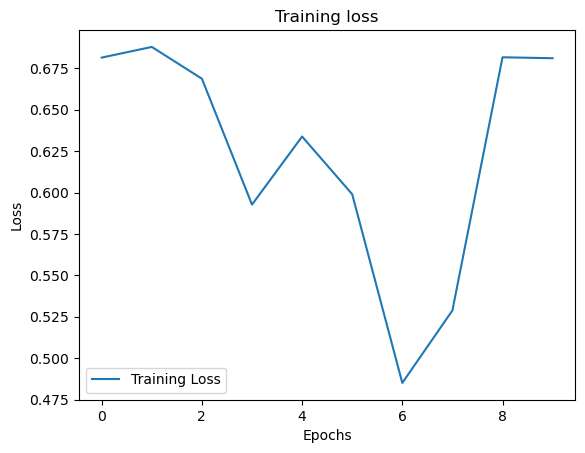

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
predictions = model_rnn.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print the first 10 predicted labels and actual labels
print("First 10 predicted labels:", predicted_labels[:10])
print("Actual labels:", y_test_onehot[:10])

1470/1470 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
First 10 predicted labels: [0 0 0 0 0 0 0 0 0 0]
Actual labels: [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
model_rnn.save("/Users/perseus/model_rnn.keras")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

actual_labels = np.argmax(y_test_onehot, axis=1)
accuracy = accuracy_score(actual_labels, predicted_labels)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(actual_labels, predicted_labels,zero_division='warn'))

Accuracy: 0.5764961082046701
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.99      0.72     26418
           1       0.80      0.04      0.08     20604

    accuracy                           0.58     47022
   macro avg       0.68      0.52      0.40     47022
weighted avg       0.67      0.58      0.44     47022



In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

def plot_roc_mnb (y_test1, data_vectorized2, clf):
  y_test_binary1 = y_test1.replace({'question': 0, 'sentence': 1})
  y_pred_proba2 = clf.predict_proba(data_vectorized2)[:, 1]
# Calculate ROC curve
  fpr2, tpr2, thresholds1 = roc_curve(y_test_binary1, y_pred_proba2)
# Calculate AUC
  roc_auc2 = auc(fpr2, tpr2)
# Plot ROC curve using RocCurveDisplay
  roc_display2 = RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2, estimator_name='Multinomial Naive Bayes')
  return roc_display2, roc_auc2
roc_mnb, auc_mnb = plot_roc_mnb(y_test1, data_vectorized2, clf)
print(roc_mnb, auc_mnb)

def plot_roc_logreg(log_reg, y_test_logreg):
  y_test_binary = y_test_logreg.replace({'question': 0, 'sentence': 1})
  y_pred_proba = log_reg.predict_proba(x_test_logreg)[:, 1]
#the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
#calculate the area under curve
  roc_auc = auc(fpr, tpr)
#the RocCurveDisplay object
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
  return roc_display, roc_auc
roc_logreg, auc_logreg = plot_roc_logreg(log_reg, y_test_logreg)
print(roc_logreg, auc_logreg)



roc_rnn, auc_rnn = plot_roc_rnn(y_test_onehot, predictions)
print(roc_rnn, auc_rnn)

<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x311225d90> 0.9800845683391335
<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x3aca57f50> 0.9938249066987633
<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x31208bc50> 0.518012806895177


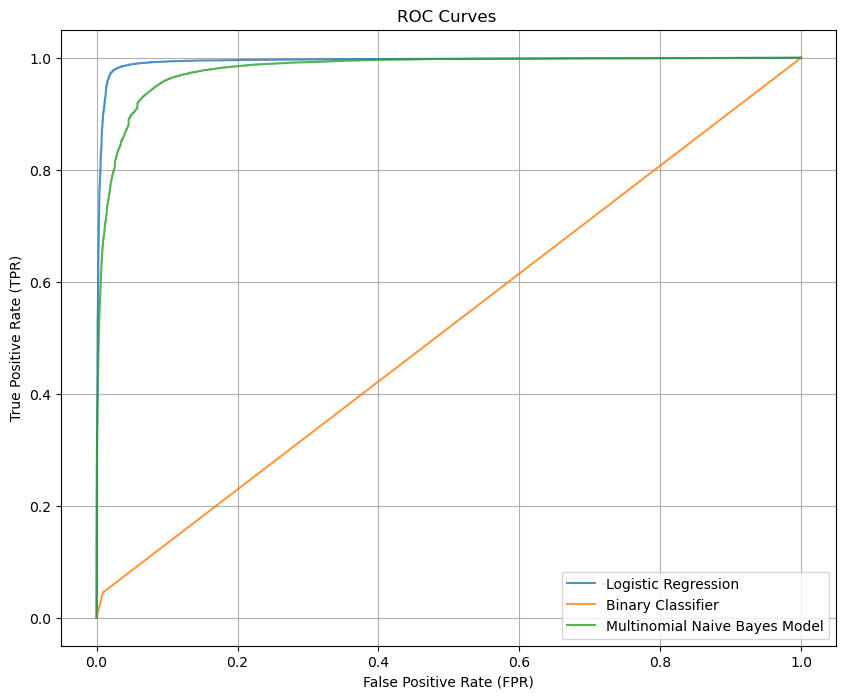

In [ ]:

plt.figure(figsize=(10, 8))

#ROC curve for Logistic Regression
roc_logreg.plot(ax=plt.gca(), alpha=0.8, label='Logistic Regression')

# ROC curve for RNN
roc_rnn.plot(ax=plt.gca(), alpha=0.8, label='Binary Classifier')
roc_mnb.plot(ax=plt.gca(), alpha=0.8, label='Multinomial Naive Bayes Model')
plt.title('ROC Curves ')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.legend()
plt.show()

## Making a Restful API using Flask
The API has post method to create. The data of ROC curve and auc has been posted, for each model.

In [ ]:
pip install flask_restful

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from werkzeug.wrappers import Request, Response
from flask import Flask, jsonify, request
from flask_restful import Resource, Api

app = Flask(__name__)
api = Api(app)


class AreaUnderCurve(Resource):
    def get(self):
        # display the form to select the model
        return '''
            <form method="post" action="/auc">
                <label for="model">Select a model:</label>
                <select name="model" id="model">
                    <option value="model1">Binary classifier with one RNN layer</option>
                    <option value="model2">Multinomial Naive Bayes</option>
                    <option value="model3">Logistic Regression</option>
                </select>
                <button type="submit">Submit</button>
            </form>
        '''

    def post(self):
        # get the selected model from the form data
        selected_model = request.form.get('model')

        # return the area under curve for the selected model
        if selected_model == 'model1':
            return jsonify({'auc': auc_rnn})
        elif selected_model == 'model2':
            return jsonify({'auc': auc_mnb})
        elif selected_model == 'model3':
            return jsonify({'auc': auc_logreg})
        else:
            return jsonify({'error': 'Invalid model'})

api.add_resource(AreaUnderCurve, '/auc')

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000
Press CTRL+C to quit


## Creating a dockerfile to dockerize this jupyter notebook. Adding a requirements.txt file.
